In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [99]:
df = pd.read_csv('Titanic.csv')

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [103]:
df.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [104]:
df.drop(columns='PassengerId',inplace=True)

In [105]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [106]:
# Check for missing values
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


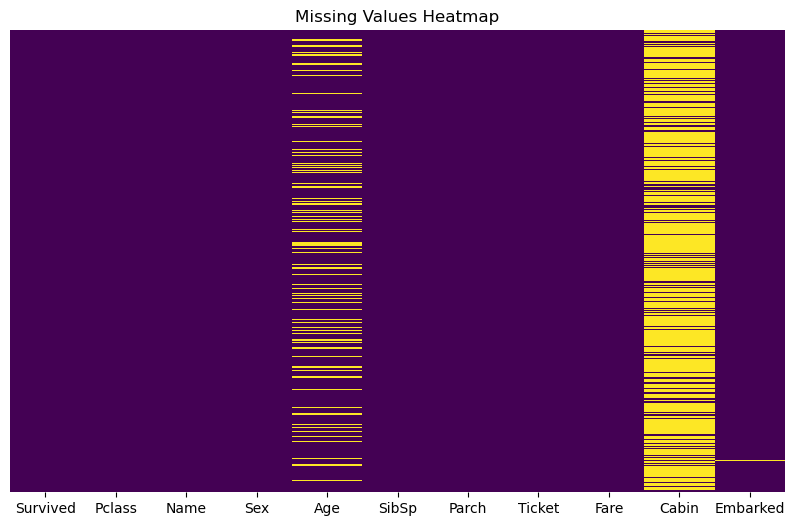

In [107]:
# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

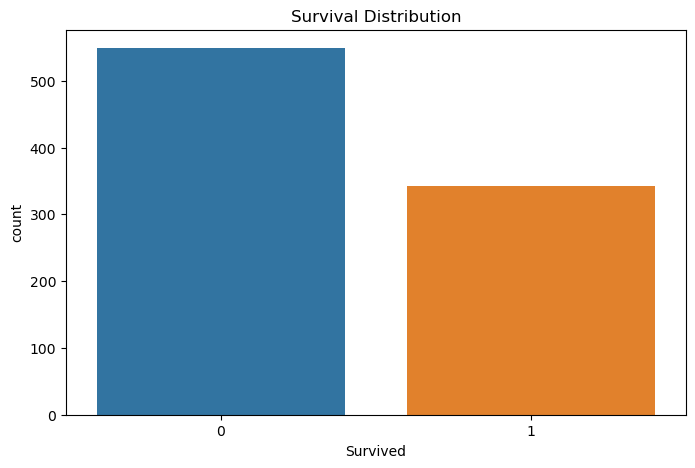

In [108]:
#Visualizing the distribution of survival
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

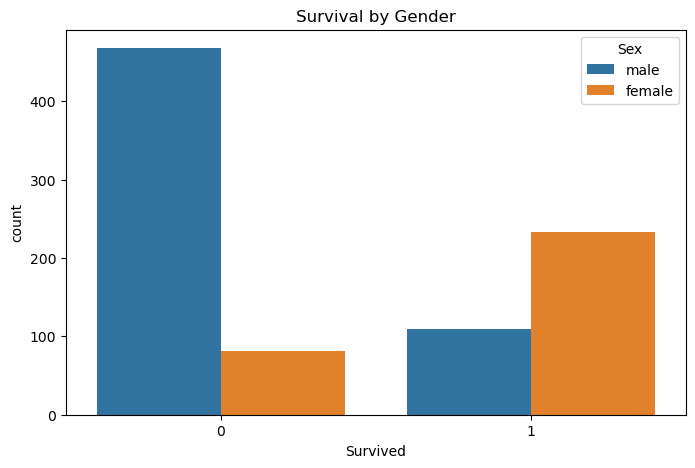

In [109]:
# Visualizing survival based on gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()


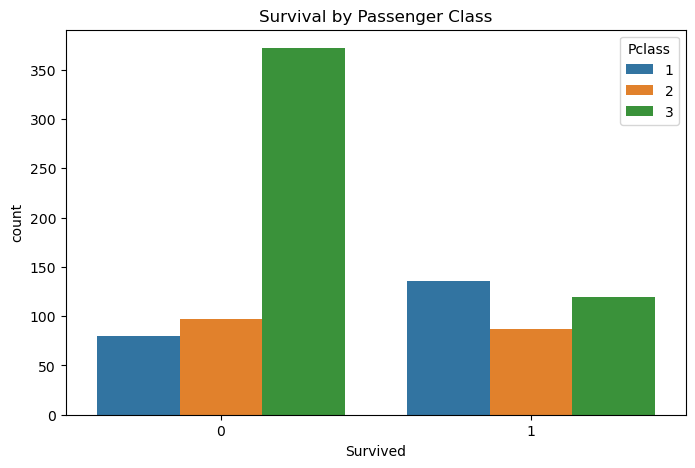

In [110]:
# Visualizing survival based on passenger class
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()


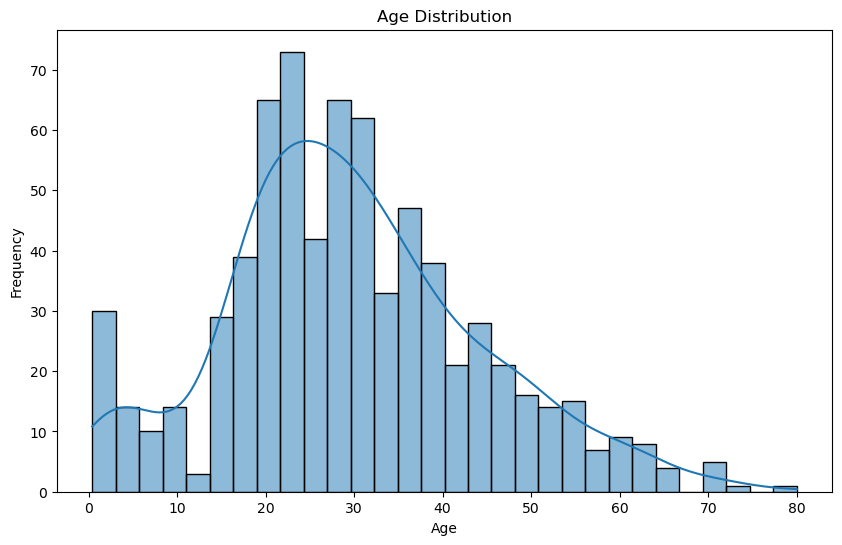

In [111]:
# Visualizing distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


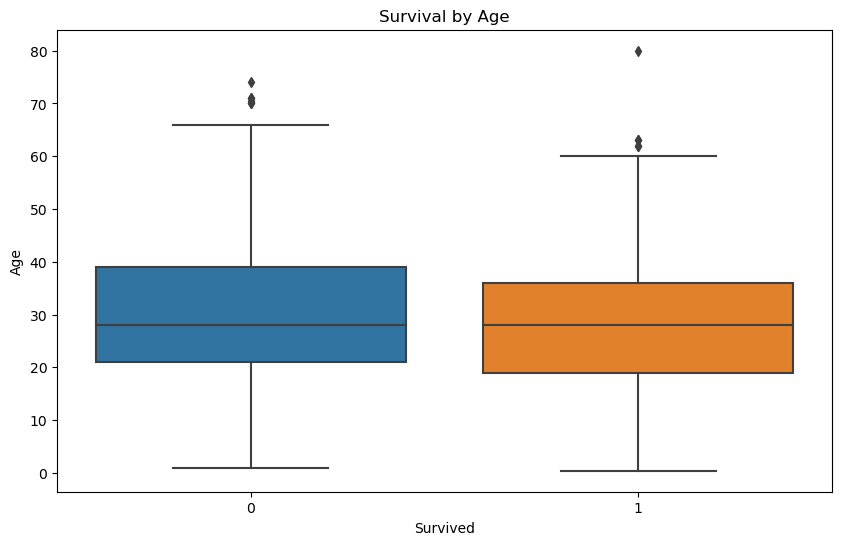

In [112]:
# Visualizing survival based on age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival by Age')
plt.show()

### Treat Missing Values

In [113]:
# Impute missing values for Age
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

In [114]:
# Impute missing values for Embarked with the mode
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

In [115]:
# Impute missing values for Cabin with a new category 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

In [116]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [117]:
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Adding 1 for the passenger itself

In [118]:

# Title Extraction
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [119]:

# Cabin Deck
df['Deck'] = df['Cabin'].str[0]


In [120]:

# Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, np.inf], labels=['Child', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])


In [121]:

# Fare Group
df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [122]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Deck,AgeGroup,FareGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,Mr,U,Young Adult,Low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,C,Adult,Very High
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,Miss,U,Young Adult,Medium
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs,C,Adult,Very High
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,Mr,U,Adult,Medium


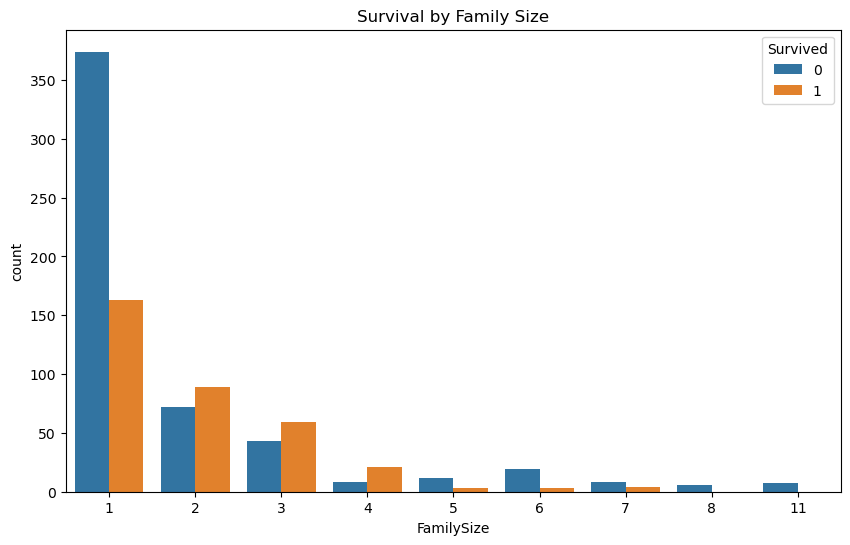

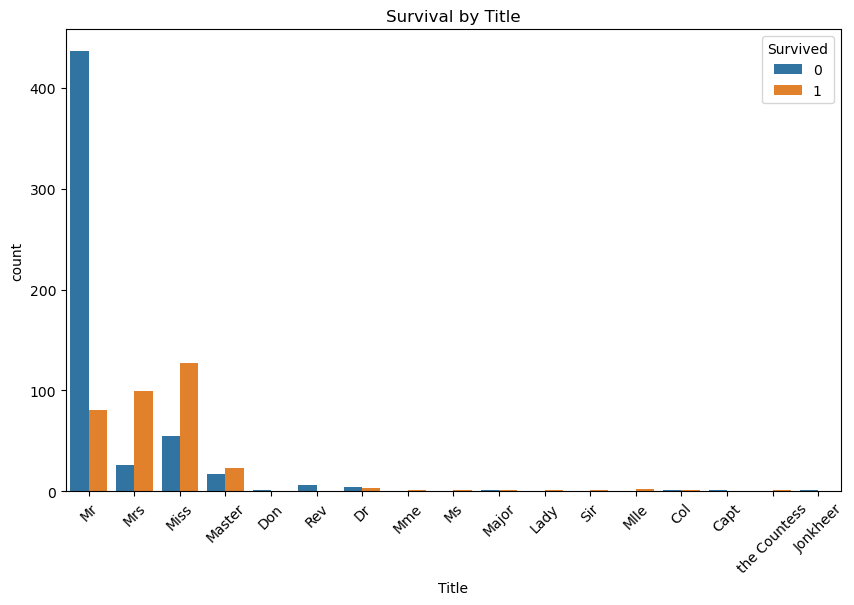

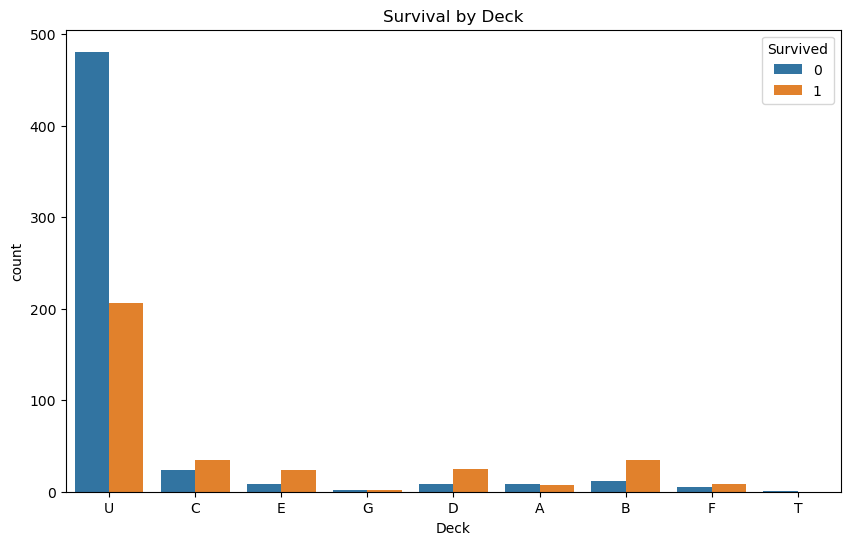

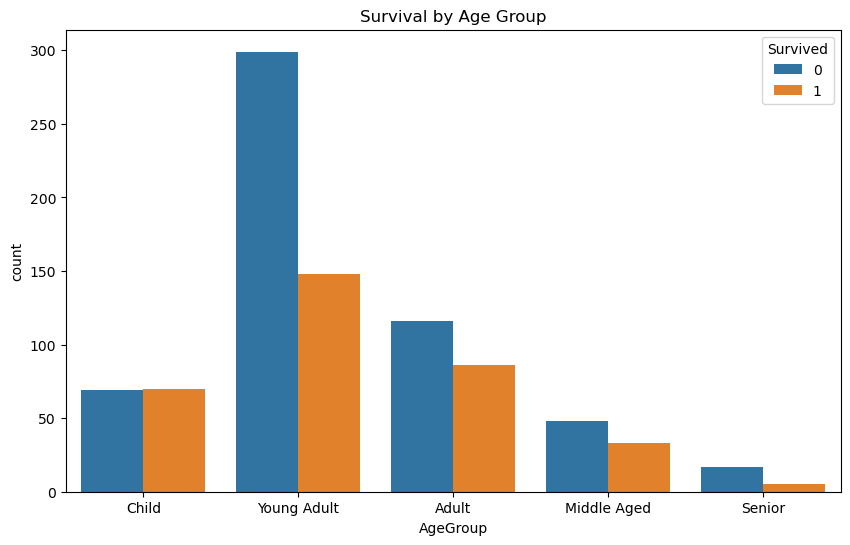

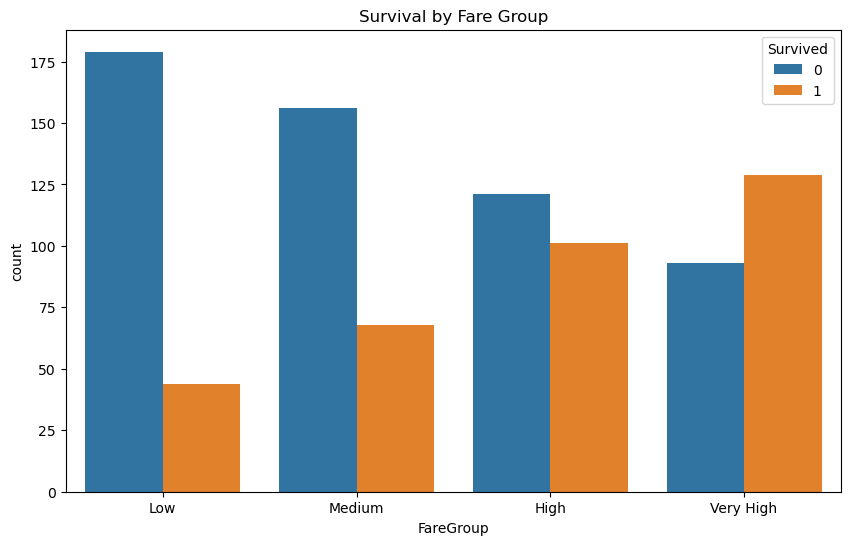

In [123]:
# Visualize the new features
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survival by Title')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', hue='Survived', data=df)
plt.title('Survival by Deck')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Survival by Age Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='FareGroup', hue='Survived', data=df)
plt.title('Survival by Fare Group')
plt.show()


### Infrances

## Feature encoding

In [139]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Deck,AgeGroup,FareGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,Mr,U,Young Adult,Low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,C,Adult,Very High
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,Miss,U,Young Adult,Medium
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs,C,Adult,Very High
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,Mr,U,Adult,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,1,Rev,U,Young Adult,Medium
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss,B,Young Adult,High
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S,4,Miss,U,Young Adult,High
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr,C,Young Adult,High


In [142]:
# Select categorical columns
categorical_cols = ['Sex', 'Embarked', 'Title', 'Deck', 'AgeGroup', 'FareGroup']

# One-hot encode categorical features
encoded_data = pd.get_dummies(df, columns=categorical_cols)

# Encode 'Sex' feature
encoded_data['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
encoded_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Name                  891 non-null    object 
 3   Age                   891 non-null    float64
 4   SibSp                 891 non-null    int64  
 5   Parch                 891 non-null    int64  
 6   Ticket                891 non-null    object 
 7   Fare                  891 non-null    float64
 8   Cabin                 891 non-null    object 
 9   FamilySize            891 non-null    int64  
 10  Sex_female            891 non-null    uint8  
 11  Sex_male              891 non-null    uint8  
 12  Embarked_C            891 non-null    uint8  
 13  Embarked_Q            891 non-null    uint8  
 14  Embarked_S            891 non-null    uint8  
 15  Title_Capt            8

In [145]:
# List of categorical columns to exclude
categorical_columns_to_exclude = ['Cabin', 'Ticket', 'Name']

# Drop categorical columns from the DataFrame
final_df = encoded_data.drop(columns=categorical_columns_to_exclude)
final_df


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,...,AgeGroup_Child,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Middle Aged,AgeGroup_Senior,FareGroup_Low,FareGroup_Medium,FareGroup_High,FareGroup_Very High,Sex
0,0,3,22.0,1,0,7.2500,2,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,38.0,1,0,71.2833,2,1,0,1,...,0,0,1,0,0,0,0,0,1,1
2,1,3,26.0,0,0,7.9250,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,1,0,0,...,0,0,1,0,0,0,0,0,1,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
887,1,1,19.0,0,0,30.0000,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1
888,0,3,28.0,1,2,23.4500,4,1,0,0,...,0,1,0,0,0,0,0,1,0,1
889,1,1,26.0,0,0,30.0000,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



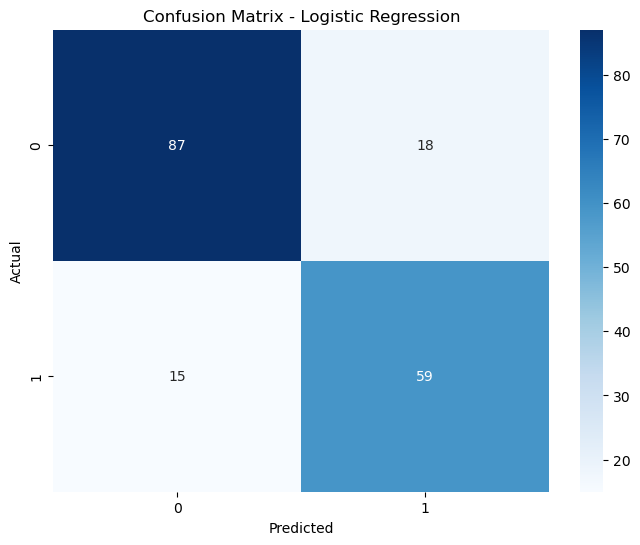

Model: Decision Tree
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       105
           1       0.70      0.74      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.76      0.76      0.76       179



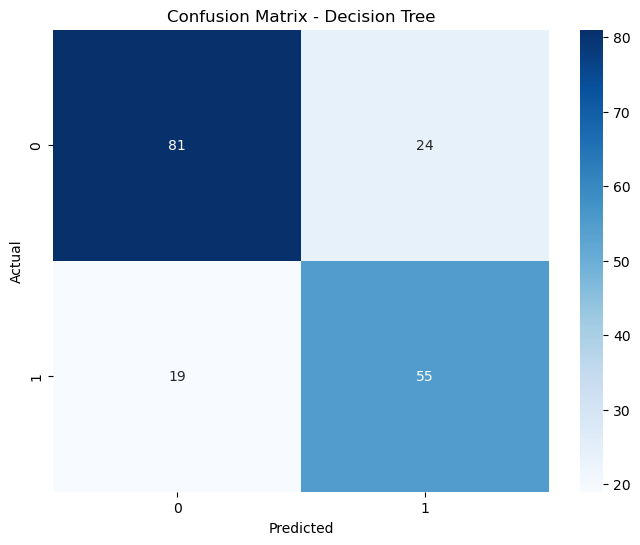

Model: Random Forest
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



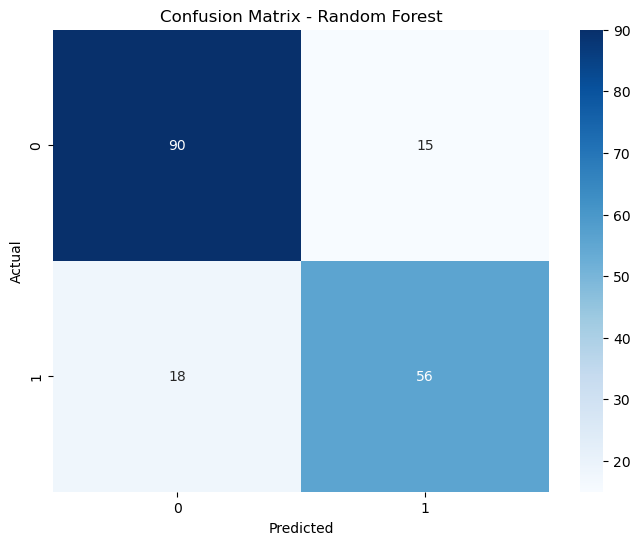

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = final_df.drop(columns=['Survived'])
y = final_df['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the evaluation results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    print("="*50)
    
        # Confusion Matrix Heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



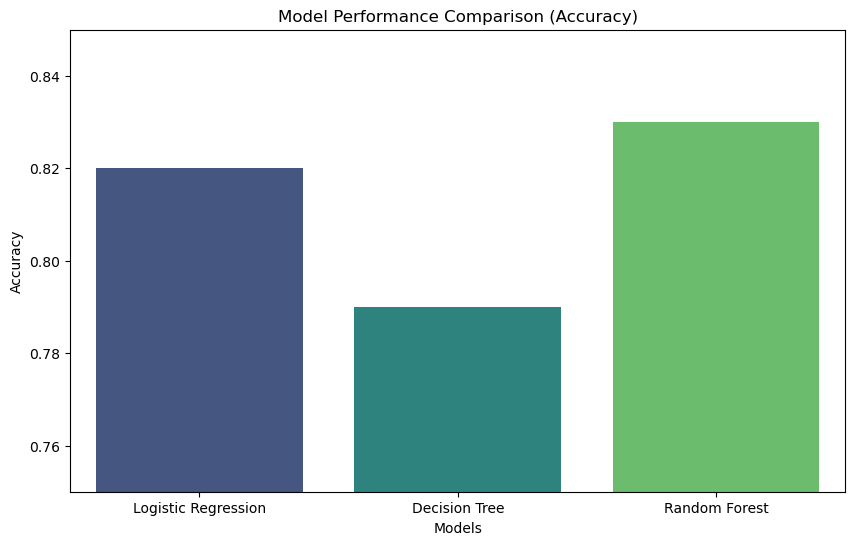

In [147]:
# Model Performance Visualization
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.82, 0.79, 0.83]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Model Performance Comparison (Accuracy)')
plt.ylim(0.75, 0.85)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()


### Infrances 